In [1]:
# Install packages
import matplotlib
import numpy

In [2]:
# get data from github

#

In [3]:
import tensorflow as tf
import os

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [4]:
# define the directories where the imgaes are
pizza_directory="./pizza/"
not_pizza_directory="./not_pizza/"

# get the images from the directories

not_pizza_files=[[0, not_pizza_directory, i] for i in os.listdir(not_pizza_directory)]
pizza_files=[[1, pizza_directory, i] for i in os.listdir(pizza_directory)]

print("Number of pizza images:",len(pizza_files))
print("Number of non-pizza images:",len(not_pizza_files))

# combine the image sets

all_files = not_pizza_files + pizza_files

print("Total number of images:", len(all_files))

# each element in all_files is of the format [is_pizza: boolean, directory: string, filename: string]
# in other words, for each `img` in `all_files`:
#    - img[0] = 0 if not pizza, 1 if pizza
#    - img[1] = directory where the image is
#    - img[2] = file name

Number of pizza images: 983
Number of non-pizza images: 983
Total number of images: 1966


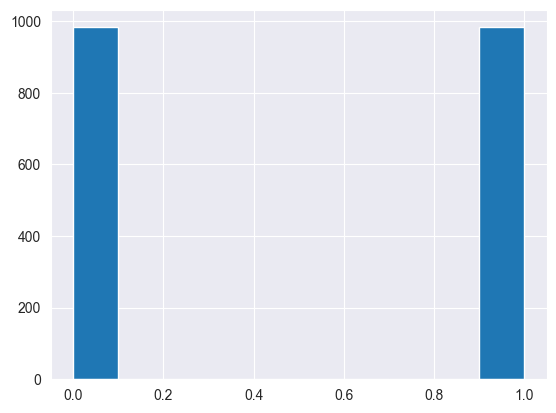

In [5]:
# this is not necessary, but we're doing it just incase

# plotting 

import matplotlib.pyplot as plt

classes = []

for img in all_files:
    classes.append(img[0])

plt.hist(classes)
plt.show()

In [ ]:
# We have two classes: Pizza and Not Pizza. We have 983 images each

In [6]:
# check size of all images
from PIL import Image
image_sizes_set = set()
image_sizes = []

for image in all_files:
    imgData = Image.open(image[1] + image[2]).convert("L") #converts it all to grayscale, 2d matrix
    image_sizes_set.add(imgData.size)
    image_sizes.append(imgData.size)

for size in image_sizes_set:
    num = image_sizes.count(size)
    print("Image (Lenght, width):count\n",f'{size}: {num}')
      

Image (Lenght, width):count
 (512, 342): 11
Image (Lenght, width):count
 (512, 461): 1
Image (Lenght, width):count
 (512, 287): 4
Image (Lenght, width):count
 (341, 512): 4
Image (Lenght, width):count
 (512, 406): 1
Image (Lenght, width):count
 (508, 512): 1
Image (Lenght, width):count
 (512, 308): 1
Image (Lenght, width):count
 (512, 366): 3
Image (Lenght, width):count
 (512, 372): 1
Image (Lenght, width):count
 (288, 512): 4
Image (Lenght, width):count
 (512, 329): 1
Image (Lenght, width):count
 (343, 512): 1
Image (Lenght, width):count
 (512, 439): 1
Image (Lenght, width):count
 (512, 445): 1
Image (Lenght, width):count
 (512, 384): 362
Image (Lenght, width):count
 (510, 512): 2
Image (Lenght, width):count
 (512, 509): 3
Image (Lenght, width):count
 (442, 512): 1
Image (Lenght, width):count
 (424, 512): 2
Image (Lenght, width):count
 (512, 506): 1
Image (Lenght, width):count
 (512, 512): 1084
Image (Lenght, width):count
 (382, 512): 66
Image (Lenght, width):count
 (512, 451): 1
Imag

In [64]:
# We notice that more than half of the images are of the size 512x512
# Hence for preprocessing we will skew (i.e. stretch) the images to 512x512

# We will use the PIL library to stretch the images to a standard size of 512x512. 
# Then we will use np.array and Image.open() to convert the images to a 2d array of rgb values, and then store them into a pandas dataframe.
# i.e. each image is converted to a 3d array of dimensions [512][512][3]
#Additionally, given these are real life photos of pizza and not pizza, we can assume we have a dense dataset.

In [10]:
# example of converting image to 3d numpy array

import numpy as np

img = Image.open(all_files[0][1] + all_files[0][2])

img.show()
print(np.array(img))

[[[ 23  10   2]
  [ 25  12   4]
  [ 28  13   6]
  ...
  [ 12   7   4]
  [ 10   5   2]
  [  9   4   1]]

 [[ 23  10   2]
  [ 25  12   4]
  [ 28  13   6]
  ...
  [ 12   7   4]
  [ 11   6   3]
  [  9   4   1]]

 [[ 24  11   3]
  [ 26  13   5]
  [ 29  14   7]
  ...
  [ 12   7   4]
  [ 10   6   3]
  [  8   4   1]]

 ...

 [[ 93  37  12]
  [ 94  38  13]
  [ 95  39  14]
  ...
  [ 69  17   6]
  [ 64  12   1]
  [ 60   8   0]]

 [[ 94  40  14]
  [ 97  43  17]
  [100  46  20]
  ...
  [ 59  10   0]
  [ 58   9   0]
  [ 57   8   0]]

 [[ 86  32   6]
  [ 92  38  12]
  [ 97  43  17]
  ...
  [ 75  26  12]
  [ 77  28  14]
  [ 80  31  17]]]
